In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [2]:
data=pd.read_csv("./consumocobre.csv")

In [3]:
data.head()

,const,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,World consumption,Date
0,1.0,26.56,0.70,19.76,0.98,3173.0,1951-01-01
1,1.0,27.31,0.71,20.78,1.04,3281.1,1952-01-01
2,1.0,32.95,0.72,22.55,1.05,3135.7,1953-01-01
3,1.0,33.90,0.70,23.06,0.97,3359.1,1954-01-01
4,1.0,42.70,0.74,24.93,1.02,3755.1,1955-01-01


In [4]:
exog=data.iloc[:, [0,1,2,3,4]]
endog=data["World consumption"]

In [5]:
mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:      World consumption   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -154.720
Date:                Sat, 19 Sep 2020   R-squared:                       0.965
Time:                        11:01:58   AIC                            319.441
Sample:                             0   BIC                            325.535
                                 - 25   HQIC                           321.131
Covariance Type:            nonrobust   Scale                       117717.127
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6562.3719   2378.939     -2.759      0.006   -1.12e+04   -1899.737
COPPERPRICE      -13.8132     15.041     -0.918      0.358     -43.292      15.666
INCOMEINDEX      1.21e+04    763.401

In [6]:
print(res.recursive_coefficients.filtered)

[[     2.88890087      4.94795049   1558.41803037   1958.43326647
  -51474.95653949  -4168.95010887  -2252.61351209   -446.55910011
   -5288.39794178  -6942.31934916  -7846.08902277  -6643.15120263
   -6274.11014597  -7272.01695425  -6319.0264789   -5822.23928518
   -6256.30902083  -6737.4044532   -6477.42840698  -5995.90746132
   -6450.80677002  -6022.92165717  -5258.35151925  -5320.89135505
   -6562.37192529]
 [    76.72920702     89.16264129    -72.4320157    -125.78988238
    -510.17807928    -12.63739099      7.23724437     -2.59788801
     -11.37291738    -13.31237176    -12.92961045    -14.58919519
     -17.75868399    -18.7853927     -17.91987577    -20.00136091
     -28.18841638    -35.62088681    -33.68526354    -25.58419707
     -26.40467343    -26.50604816    -24.88280831    -23.68948027
     -13.81318296]
 [     2.02223061      2.90016636    822.46823252    425.53955938
  105755.9576864   14397.96649483  10946.49416209   5496.75965892
   13745.39033715  17324.01229994  229

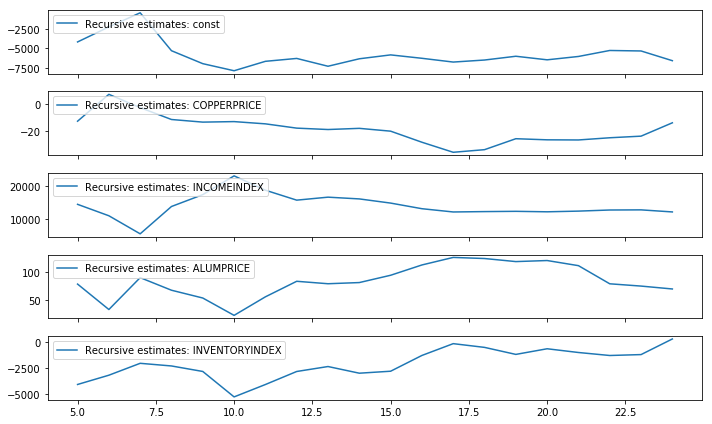

In [7]:
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6));

In [8]:
C=res.recursive_coefficients.filtered

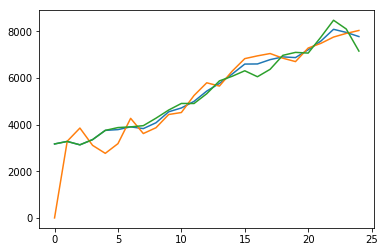

In [9]:
plt.plot(C[0]+C[1]*data.COPPERPRICE+C[2]*data.INCOMEINDEX+C[3]*data.ALUMPRICE+C[4]*data.INVENTORYINDEX)
plt.plot(res.fittedvalues)
plt.plot(data['World consumption'])

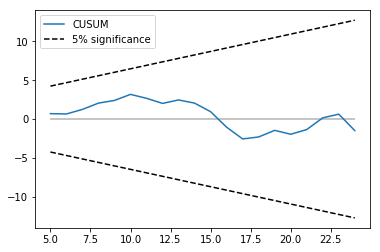

In [10]:
res.plot_cusum();